In [3]:
#Import the standard pylab libraries, matplotlib.pyplot as plt , numpy as np
%pylab inline

import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


/Users/navjot/miniconda3/envs/devito/lib/python3.8/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['clf']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


### Breast Cancer example revisited
Let's revisit an example we saw on the first day - the breast cancer dataset. 

A quick recap of what we did then:
- Load the data
- PCA transform
- Train LogisticRegression classifier
- Report performance

Today we would like to:
- Redo the exercise here, but this time split the data into test/train and report your accuracy on the test set. 

- The [Logistic Regression classifier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) accepts a _C_ parameter, that is the inverse regularization strength. Find the value of C that gives the best accuracy. 

- Use a [convenience tool](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) to automatically conduct such analyses and find the best value for C. Does PCA improve the results or worsen them? Does scaling improve or worsen them?

- Bonus: Try [another](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) classifier from Scikit-learn on the same dataset. 




 Accuracy obtained with Logistic Regression: 95.6 percent 



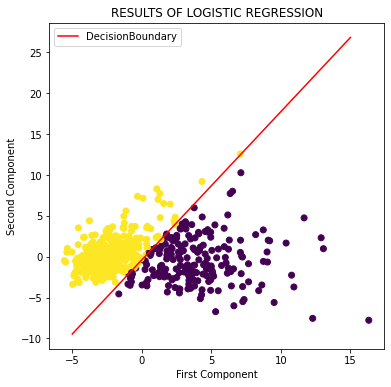

In [8]:
from sklearn.datasets import load_breast_cancer
from   sklearn.linear_model    import LogisticRegression
from sklearn.decomposition import PCA
from   sklearn.metrics         import accuracy_score
from sklearn.preprocessing import StandardScaler


X, y = load_breast_cancer(return_X_y=True)
scaler = StandardScaler()
Xscaled  = scaler.fit_transform(X)
X_pca = PCA(n_components=2).fit_transform(Xscaled)



clf     = LogisticRegression(solver='lbfgs')
clf.fit(X_pca, y)
y_logis = clf.predict(X_pca)
coef    = clf.coef_
bias    = clf.intercept_

xlin     = pylab.linspace(-5, 15, 3000)
ylin     = -(bias[0]+coef[0,0]*xlin)/coef[0,1]

print('\n'*2,"Accuracy obtained with Logistic Regression: %2.1f percent" % (accuracy_score(y, y_logis)*100),'\n'*1)
plt.figure  (figsize=(6,6))
plt.scatter (X_pca[:, 0], X_pca[:, 1], c=y_logis)
plt.plot    (xlin, ylin, 'r-', label='DecisionBoundary')
plt.xlabel  ('First Component')
plt.ylabel  ('Second Component')
plt.title   ('RESULTS OF LOGISTIC REGRESSION')
plt.legend  ()
plt.show    ()

What is wrong with the above accuracy score?

We are reporting accuracy on the same data that we used to train the classifier! The classifier has seen the labels for all these examples (and still gets ~4% wrong)!

Ideally, we should split this data into a train/test/validation split and only report the performance on the test dataset. We will use the StratifiedShuffleSplit to create a 80/20 train/test split.

### Plot regularization strength vs. Test and Train Accuracy on a log scale. Which factor of C do you choose?

## GridSearch

The above hyperparameter search is so common that we often have utilities to automate this for us. 

#### Without PCA

### Bonus Reading Material

1. Normalization, briefly touched upon in the lectures, is a source of a lot of confusion especially because of confusing nomenclature. [Here](https://sebastianraschka.com/Articles/2014_about_feature_scaling.html) is a blog post by Sebastian Raschka that discusses feature scaling in detail. 

2. A major problem in using Deep Neural Networks is the difficulty of understanding _what_ a Neural Network is doing. Read the blog post 
[here](http://colah.github.io/posts/2014-03-NN-Manifolds-Topology/) by 
[Chris Olah](https://ai.google/research/people/ChristopherOlah) on the topology of neural networks for some insight on the inner working of a neural network.
